## Tải các thư viện cần thiết 

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install scikit-learn 
# !pip install seaborn

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

from itertools import product

##  Tổng quan về dữ liệu 

In [2]:
df = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/Alzheimer-s-diagnosis/data/alzheimers_disease_data.csv")


In [3]:
df.head(5)


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
df = df.drop(columns=["DoctorInCharge"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

Ta thấy dữ liệu gồm 2149 bản ghi, mỗi bản ghi gồm 35 hàng

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


## Tiền xử lý dữ liệu 

In [46]:
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

Không có dữ liệu nào bị thiếu

In [47]:
df.duplicated().sum()

0


Không có hai bản ghi nào trùng lặp

## Trực quan hóa dữ liệu 

In [48]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR)))
outliers_count = outliers.sum()
print(f"Số ngoại lệ :\n{outliers_count}")

Số ngoại lệ :
PatientID                      0
Age                            0
Gender                         0
Ethnicity                    211
EducationLevel                 0
BMI                            0
Smoking                        0
AlcoholConsumption             0
PhysicalActivity               0
DietQuality                    0
SleepQuality                   0
FamilyHistoryAlzheimers        0
CardiovascularDisease        310
Diabetes                     324
Depression                   431
HeadInjury                   199
Hypertension                 320
SystolicBP                     0
DiastolicBP                    0
CholesterolTotal               0
CholesterolLDL                 0
CholesterolHDL                 0
CholesterolTriglycerides       0
MMSE                           0
FunctionalAssessment           0
MemoryComplaints             447
BehavioralProblems           337
ADL                            0
Confusion                    441
Disorientation               

Biểu đồ cột cho thấy phân phối dữ liệu tổng quan của các trường: 


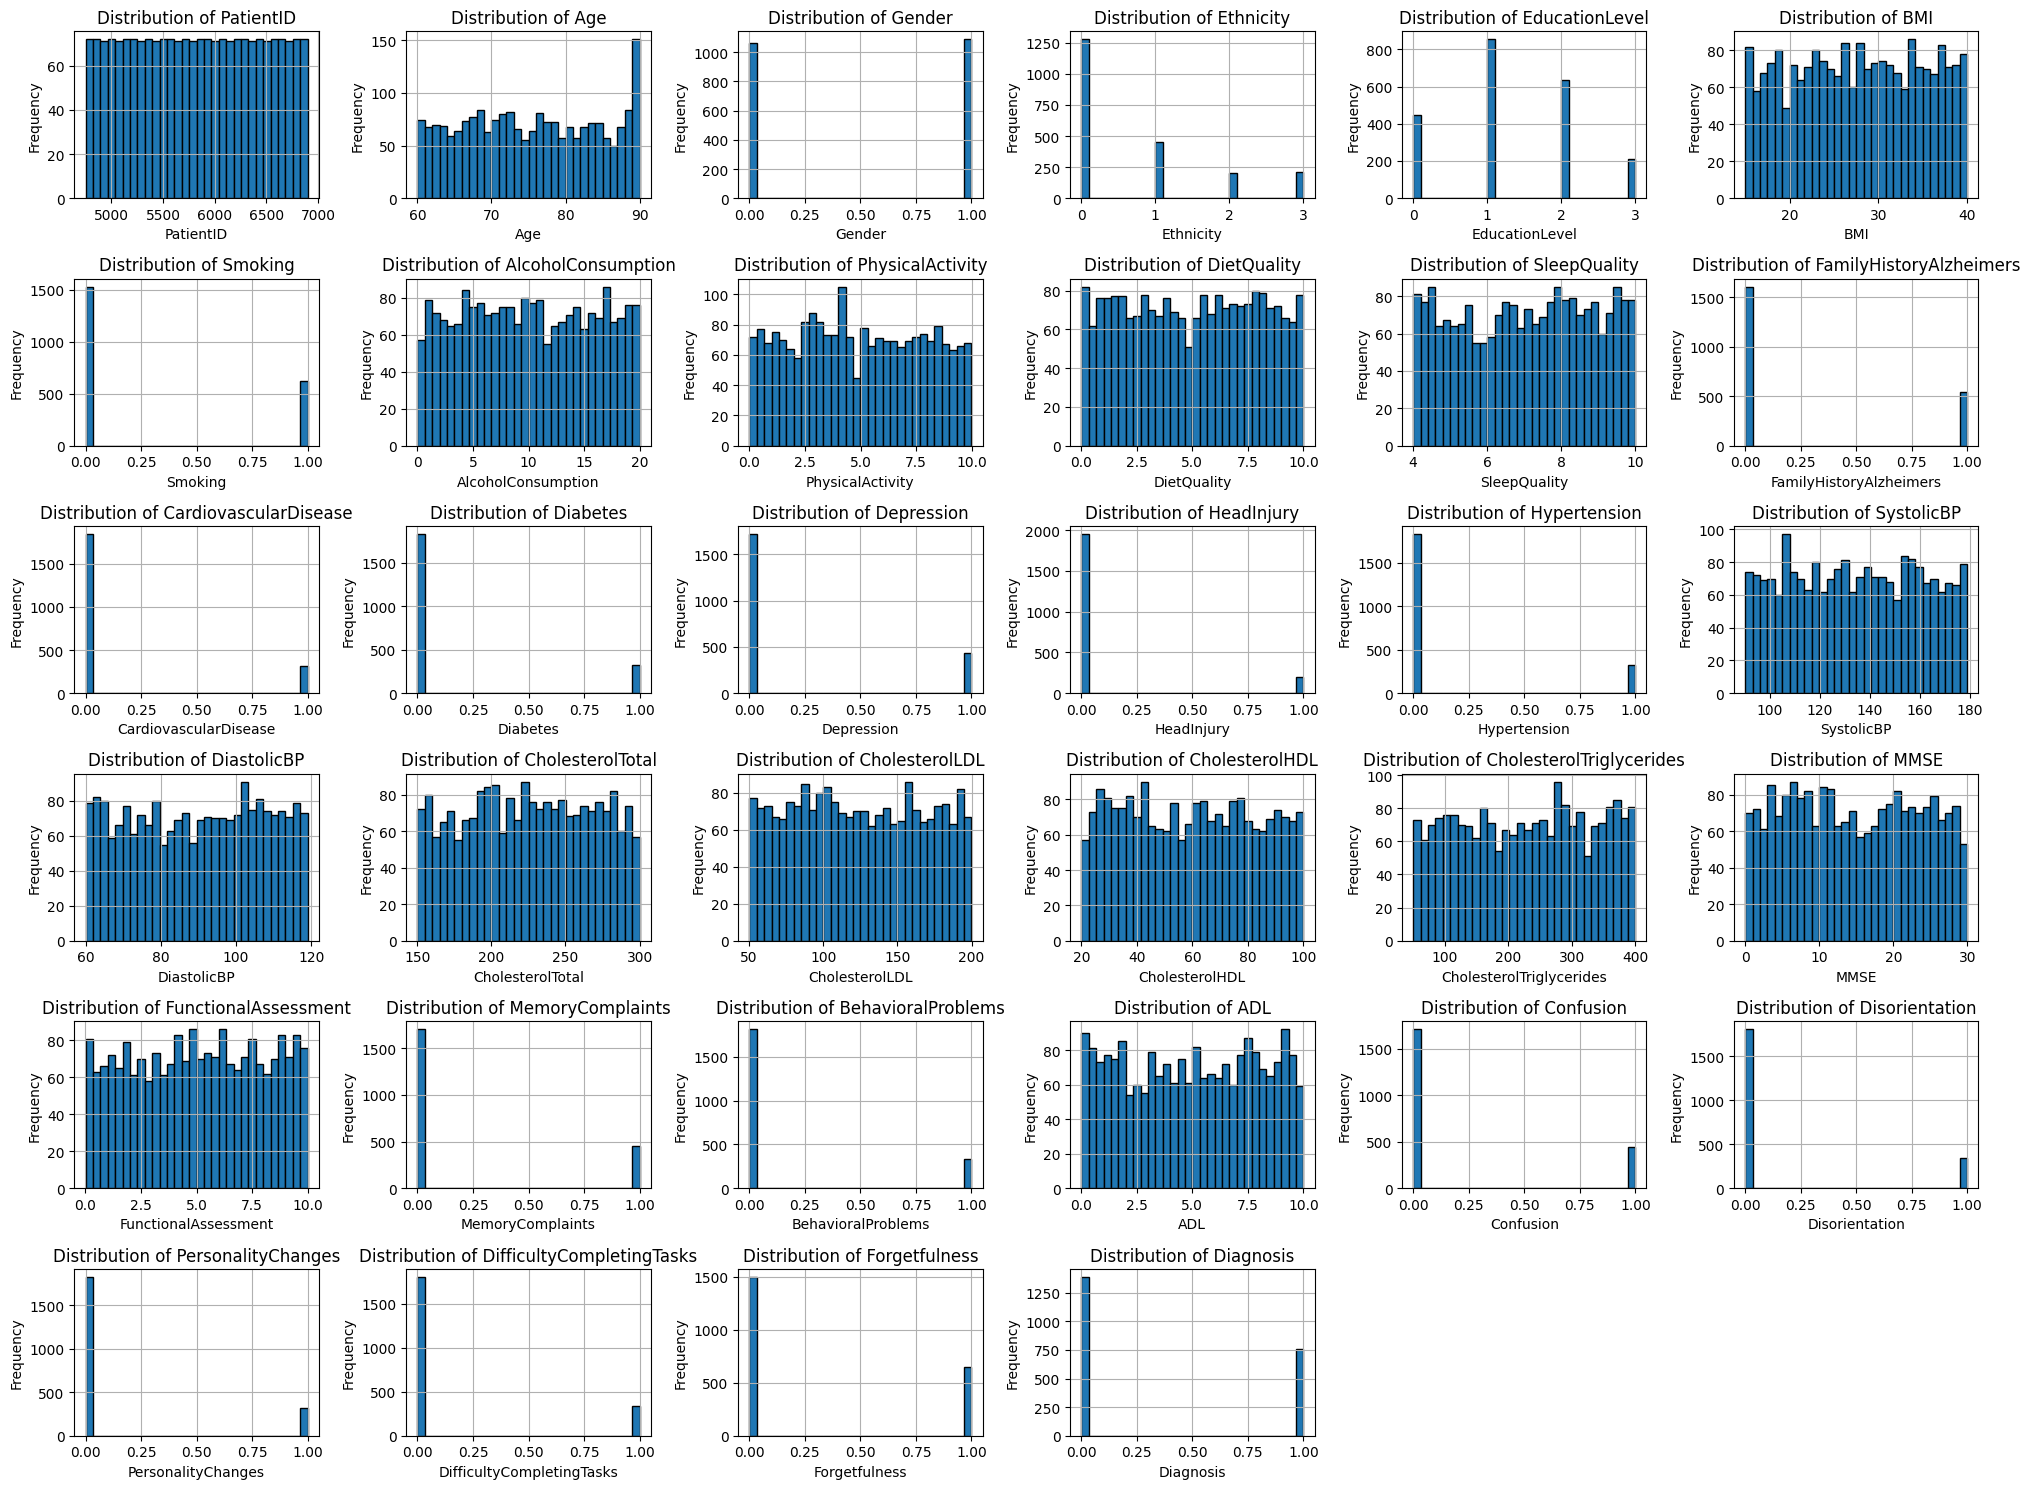

In [49]:
axes = df.hist(figsize=(20,15), bins=30, edgecolor='black')
for ax, col in zip(axes.flatten(), numeric_columns):
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {col}')
print("Biểu đồ cột cho thấy phân phối dữ liệu tổng quan của các trường: ")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Ma trận tương quan giữa các chỉ số')

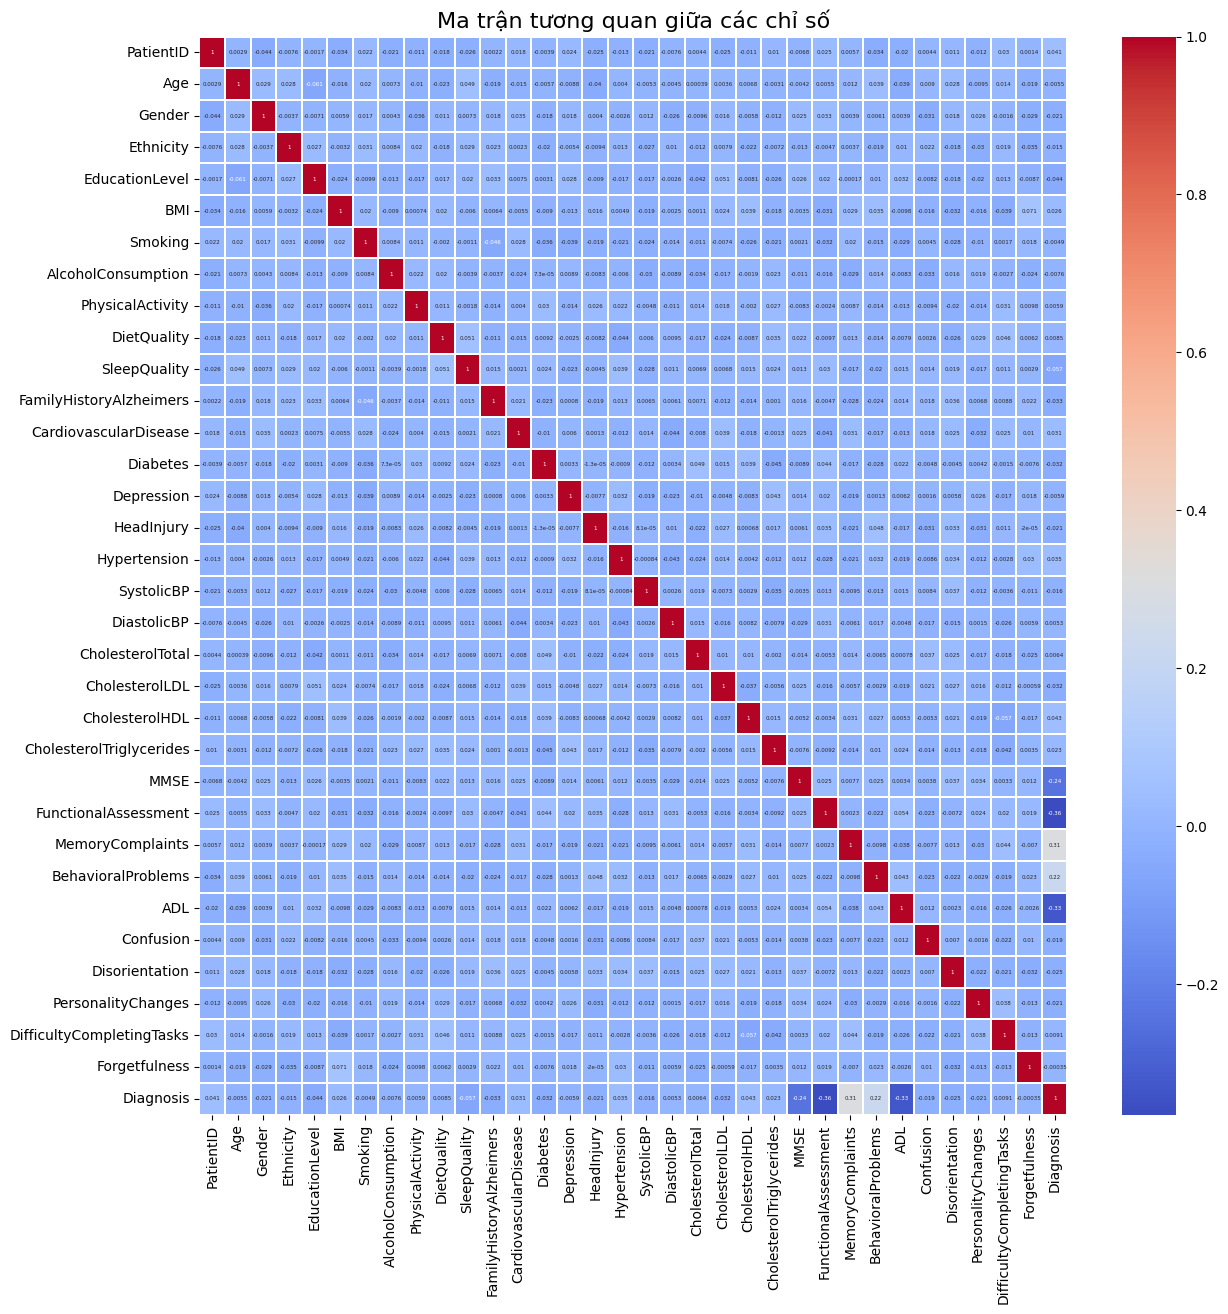

In [50]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.1, annot_kws={"size": 4})  
plt.title("Ma trận tương quan giữa các chỉ số", fontsize=16)  

Từ ma trận tương quan trên ta thấy được mức độ tương quan giữa các thuộc tính là rất yếu!!!

## Chia dữ liệu 

In [51]:
x = df.drop(columns=["PatientID", "Diagnosis"])
y = df["Diagnosis"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [13]:
x_test

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
1159,88,1,1,0,26.341457,0,17.793866,1.016087,5.708032,9.325018,...,14.488641,7.307851,0,0,6.800703,1,0,0,0,1
1822,76,0,1,2,30.998034,1,4.848165,0.377785,3.367394,7.872985,...,14.200631,3.170980,0,0,7.388050,0,0,0,0,1
978,73,0,0,1,19.060665,0,19.577591,9.290182,6.155534,8.472929,...,10.811239,9.013686,1,0,6.166283,0,0,0,1,1
759,77,1,0,3,36.391951,1,0.498616,7.621075,8.649806,8.639434,...,12.943559,7.826850,0,0,3.161108,1,0,0,0,0
874,71,0,1,0,39.291923,1,18.152064,0.084994,0.888331,7.799254,...,29.323470,8.746284,0,0,6.050739,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,77,1,1,1,33.888174,0,8.684451,0.495906,1.713044,8.580077,...,21.341299,6.079554,0,0,2.613975,0,1,1,0,0
1991,82,0,2,3,25.330454,0,0.904377,3.583844,9.552713,7.161885,...,20.504932,7.073866,0,0,3.467833,0,0,0,1,0
445,62,0,0,3,24.725563,0,14.815556,3.886584,5.939272,4.363278,...,6.492112,1.819516,1,0,1.971350,0,0,0,0,0
548,73,0,0,0,20.934329,1,10.782334,9.846122,7.706189,6.409516,...,11.487727,5.575551,0,0,9.745211,0,0,0,0,0


In [14]:
y_test

1159    0
1822    0
978     0
759     0
874     0
       ..
1103    0
1991    0
445     1
548     0
25      0
Name: Diagnosis, Length: 430, dtype: int64

## MODEL 

### KHAI BÁO CÁC THƯ VIỆN CẦN THIẾT 

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, ClassifierMixin

from collections import Counter
from train_and_predict import train_and_predict
from visualize_and_evaluate import visualize_and_evaluate

### Lưu mô hình tốt nhất


In [17]:
# Dictionary lưu model tốt nhất
best_models = {}

### Danh sách độ chính xácxác

In [18]:
#Tạo danh sách chính xác
Accuracy = []

### DecisionTree

Định nghĩa lớp Node và CustomDecisionTreeClassifier

In [21]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature      # Chỉ số của đặc trưng để phân chia
        self.threshold = threshold  # Ngưỡng phân chia
        self.left = left            # Node con bên trái
        self.right = right          # Node con bên phải
        self.value = value          # Giá trị dự đoán (nếu là node lá)

class CustomDecisionTreeClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, max_depth=None, min_samples_split=None, criterion='gini'):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.criterion = criterion
        self.root = None            


    def fit(self, X, y):
        # Chuyển đổi dữ liệu thành numpy array nếu cần
        X = np.array(X)
        y = np.array(y)
        # Bắt đầu xây dựng cây từ node gốc
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Điều kiện dừng: đạt độ sâu tối đa, hoặc chỉ còn một nhãn, hoặc không đủ mẫu để split
        if (self.max_depth is not None and depth >= self.max_depth) or n_labels == 1 or n_samples < self.min_samples_split:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        # Tìm split tốt nhất
        best_feature, best_threshold = self._best_split(X, y, n_features)

        # Nếu không tìm được split tốt, tạo node lá
        if best_feature is None:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        # Tạo các node con dựa trên split tốt nhất
        left_indices = X[:, best_feature] <= best_threshold
        right_indices = ~left_indices
        left = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return Node(best_feature, best_threshold, left, right)

    def _best_split(self, X, y, n_features):
        best_gain = -1
        split_feature = None
        split_threshold = None

        for feature in range(n_features):
            X_column = X[:, feature]
            thresholds = np.unique(X_column)

            for threshold in thresholds:
                # Tính Information Gain
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_feature = feature
                    split_threshold = threshold

        return split_feature, split_threshold

    def _information_gain(self, y, X_column, threshold):
        # Tính entropy của node cha
        parent_entropy = self._entropy(y)

        # Tạo các node con
        left_indices = X_column <= threshold
        right_indices = ~left_indices

        # Nếu không split được, trả về 0
        if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
            return 0

        # Tính entropy của các node con
        n = len(y)
        n_left, n_right = np.sum(left_indices), np.sum(right_indices)
        e_left, e_right = self._entropy(y[left_indices]), self._entropy(y[right_indices])
        child_entropy = (n_left/n) * e_left + (n_right/n) * e_right

        # Tính Information Gain
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _entropy(self, y):
        # Tính entropy của một nút 
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        # Trả về nhãn phổ biến nhất trong một node
        counter = Counter(y)
        return counter.most_common(1)[0][0]

    def predict(self, X):
        # Dự đoán nhãn cho dữ liệu đầu vào
        X = np.array(X)
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        # Duyệt cây để tìm nhãn dự đoán
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

Định nghĩa models và param_grids

In [22]:
models = {
    "DecisionTree": Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', CustomDecisionTreeClassifier())
    ])
}
param_grids = {
    "DecisionTree": {
        'classifier__criterion': ['entropy'],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5]
    },
}

Huấn luyện và sử dụng best_params

In [23]:
print("\nTraining DecisionTree...")
grid = GridSearchCV(models["DecisionTree"], param_grids["DecisionTree"], cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(x_train, y_train)
print(f"Best DecisionTree Parameters: {grid.best_params_}")


Training DecisionTree...
Best DecisionTree Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_split': 2}


Confusion Matrix:


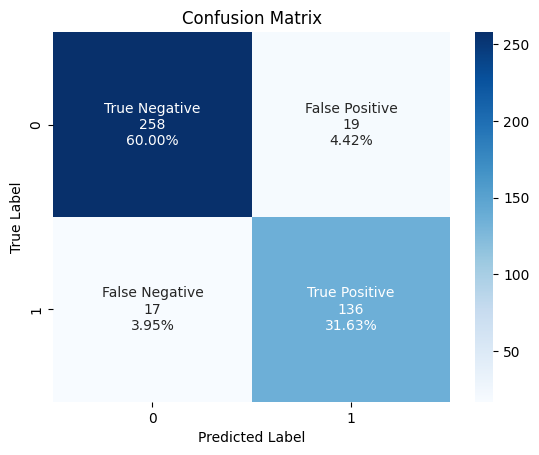

[[258  19]
 [ 17 136]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       277
           1       0.88      0.89      0.88       153

    accuracy                           0.92       430
   macro avg       0.91      0.91      0.91       430
weighted avg       0.92      0.92      0.92       430

Weighted F1-Score: 91.6399222617625


In [24]:
best_params = grid.best_params_
model1 = CustomDecisionTreeClassifier(
    max_depth=best_params['classifier__max_depth'],
    min_samples_split=best_params['classifier__min_samples_split'],
    criterion=best_params['classifier__criterion']
)
# Huấn luyện và dự đoán với model1
train_and_predict(model1, x_train, y_train, x_test, y_test, Accuracy)

### Random forrest 


Định nghĩa RandomForestClassifier: 

In [ ]:

# class RandomforestClassifier(BaseEstimator, ClassifierMixin):
#     def __init__(self, n_estimators=10, max_depth=5, min_samples_split=2, min_samples_leaf=1):
#         self.n_estimators = n_estimators
#         self.max_depth = max_depth
#         self.min_samples_split = min_samples_split
#         self.min_samples_leaf = min_samples_leaf
#         self.trees = []

#     def fit(self, X, y):
#         self.trees = []
#         for _ in range(self.n_estimators):
#             X_sample, y_sample = self._bootstrap_sample(X, y)
#             tree = CustomDecisionTreeClassifier(
#                 max_depth=self.max_depth,
#                 min_samples_split=self.min_samples_split,
#             )
#             tree.fit(X_sample, y_sample)
#             self.trees.append(tree)

#     def _bootstrap_sample(self, X, y):
#         n_samples = X.shape[0]
#         indices = np.random.choice(n_samples, size=n_samples, replace=True)
#         return X[indices], y[indices]

#     def predict(self, X):
#         tree_preds = np.array([tree.predict(X) for tree in self.trees])
#         return np.apply_along_axis(lambda x: Counter(x).most_common(1)[0][0], axis=0, arr=tree_preds)

Định nghĩa models và param_grids

In [94]:
models = {
    "RandomForest": Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier())
    ])
}

param_grids = {
    "RandomForest": {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [None, 5, 10]
    }
}


In [95]:
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
print("\nTraining RandomForest...")
grid = GridSearchCV(models["RandomForest"], param_grids["RandomForest"], cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(x_train, y_train)
print(f"Best RandomForest Parameters: {grid.best_params_}")


Training RandomForest...


KeyboardInterrupt: 

In [ ]:
best_params = grid.best_params_
model2 = RandomForestClassifier(
    n_estimators=best_params['classifier__n_estimators'],
    max_depth=best_params['classifier__max_depth'],
    min_samples_split=best_params['classifier__min_samples_split'],
    min_samples_leaf=best_params['classifier__min_samples_leaf']
)
# Huấn luyện và dự đoán với model1
train_and_predict(model1, x_train, y_train, x_test, y_test, Accuracy)

Dự đoán và đánh giá mô hình 

In [67]:

# 4. Đánh giá mô hình
print("\n--- Kết quả đánh giá mô hình Random Forest (Tự code) ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))
weighted_f1_rf = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)
print("Weighted F1-score:", weighted_f1_rf)

# 5. Vẽ ma trận nhầm lẫn
print("Confusion Matrix")

# Tính confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Tạo nhãn cho các ô trong ma trận
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{name}\n{count}\n{percent}" for name, count, percent in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Vẽ heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=labels, fmt="", cmap='Greens', cbar=False)
plt.title("Ma trận nhầm lẫn - Random Forest (Tự code)")
plt.xlabel("Giá trị dự đoán")
plt.ylabel("Giá trị thực")
plt.show()

# In ma trận và báo cáo phân loại
print(cm)
print("\nBáo cáo phân loại:\n", classification_report(y_test, y_pred_rf))

# Tính F1 score trung bình có trọng số
weighted_f1 = f1_score(y_test, y_pred_rf, average='weighted')
final_score = weighted_f1 * 100
print('Weighted F1-score:', final_score)



--- Kết quả đánh giá mô hình Random Forest (Tự code) ---
Classification Report:


NameError: name 'y_pred_rf' is not defined

#KNNKNN

In [ ]:
#KNNKNN

## Đánh giá 

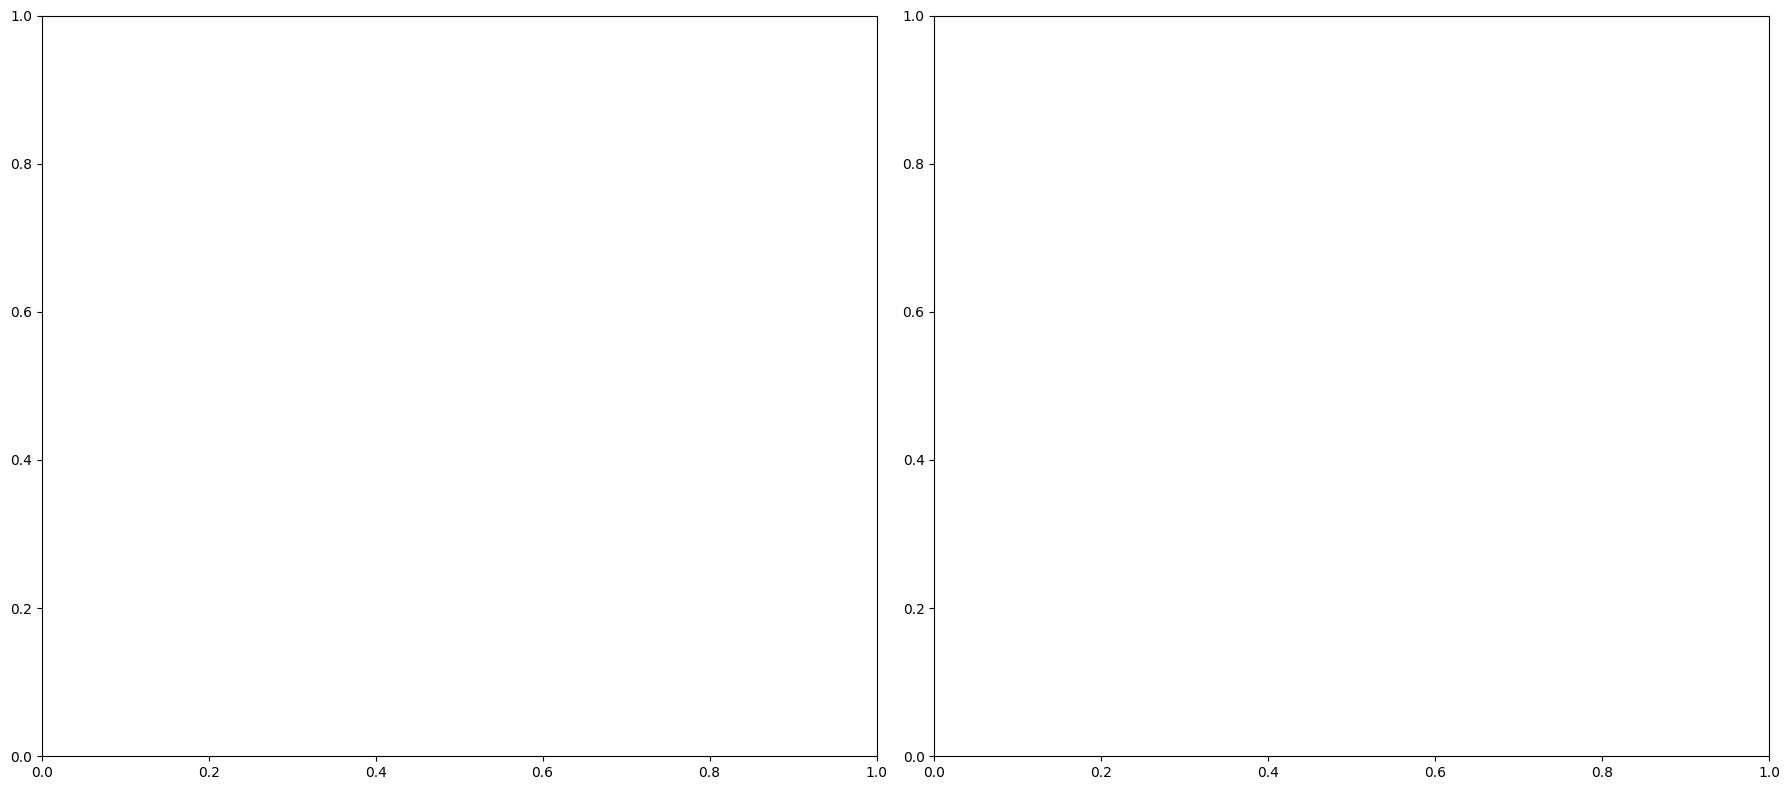

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

model_names = list(best_models.keys())
for i, model_name in enumerate(model_names):
    y_pred = best_models[model_name].predict(x_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{model_name} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()